In [2]:
from selenium import webdriver
import time
import pandas as pd
import re
from selenium.webdriver.common.by import By
#from datetime import datetime, date, timedelta
from selenium.webdriver.chrome.options import Options
import requests
import json

from webdriver_manager.chrome import ChromeDriverManager
import mysql
import mysql.connector
import os

import datetime
import unicodedata

from dotenv import load_dotenv
load_dotenv(".env")

True

In [8]:
import sshtunnel
from sshtunnel import SSHTunnelForwarder
def get_driver():
    server = sshtunnel.SSHTunnelForwarder((os.getenv('SSH_USERNAME'), 10022), 
        ssh_username="pachislot777", 
        ssh_private_key_password=os.getenv('SSH_PRIVATE_KEY_PASSWORD'), 
        ssh_pkey="sercret/akasaka.key", 
        remote_bind_address=("mysql8055.xserver.jp", 3306 )) 
    # SSH接続確認


    # 現在時刻
    today = datetime.datetime.now()
    print(today)
    #[結果] 2021-08-23 07:12:20.806648
    # 1日後
    today_str:str = today.strftime('%Y-%m-%d')
    eight_days_after:str = (today + datetime.timedelta(days=8)).strftime('%Y-%m-%d')
    yesterday:str = (today + datetime.timedelta(days=-2)).strftime('%Y-%m-%d')
    #### Create dataframe from resultant table ####

    server.start()

    print(f"local bind port: {server.local_bind_port}")
    # データベース接続
    cnx = mysql.connector.connect(
        host="localhost", 
        port=server.local_bind_port, 
        user=os.getenv('WORDPRESS_DB_ID'), 
        password=os.getenv('DB_PASSWORD'), 
        database=os.getenv('WORDPRESS_DB_NAME'), 
        charset='utf8',
        use_pure=True
        )

    # 接続確認
    print(f"sql connection status: {cnx.is_connected()}")
    cursor = cnx.cursor()
    return cursor, cnx, server

### MYSQLのバージョンを確認する

In [19]:
cursor, cnx, server = get_driver()
sql = f"""select version();
        """
print(sql)
cursor.execute(sql)
myresult = cursor.fetchall()
 
print(myresult)

2023-06-29 15:51:52.355970
local bind port: 61420
sql connection status: True
select version();
        
[('5.7.27',)]


### テーブルの数を数える

In [93]:
cursor.execute("show tables;")
myresult = cursor.fetchall()
 
for x in myresult:
  print(x[0])

maptable
parlar_data
pledge
schedule


### それぞれのテーブルの確認

In [96]:
for table_name in myresult:
        print(table_name[0])
        sql = f"""
SELECT *
FROM {table_name[0]} 
limit 10"""
        print(sql)
        cursor.execute(sql)
        #cols = [col[0] for col in cursor.description]
        cols = cursor.column_names
        convart_table_df = pd.DataFrame(cursor.fetchall(),columns = cols)
        display(convart_table_df.head())

maptable

SELECT *
FROM maptable 
limit 10


,parlar_map_id,都道府県,kintone_id,shop_id,ホールナビ店舗名,DMM店舗名,アナスロ店舗名,緯度,経度,住所,取得時間
0,46,北海道,P01378,1378,アミューズメントパーラー吉兆,アミューズメントパーラー吉兆,アミューズメントパーラー吉兆,43.0858,141.515,北海道江別市大麻泉町47-37,2023-03-18 05:36:38
1,47,北海道,P01582,1582,ひまわり音更店,音更ひまわり,ひまわり音更店,42.9614,143.207,北海道河東郡音更町木野大通東13丁目1番21,2023-03-18 05:36:38
2,48,北海道,P01351,13160,EBH,EBH,EBH,43.1063,141.293,北海道札幌市西区発寒15条4-13-1,2023-03-18 05:36:38
3,49,茨城県,P02562,2562,キコーナ水戸駅南店,キコーナ水戸駅南店,キコーナ水戸駅南店,36.3655,140.477,茨城県水戸市城南1-4-1,2023-03-18 05:36:38
4,50,神奈川県,P04933,4933,ピーズ・タウン桜ヶ丘,P’Stown桜ヶ丘,ピーズ・タウン桜ヶ丘,35.4511,139.465,神奈川県大和市福田1-6-10,2023-03-18 05:36:39


parlar_data

SELECT *
FROM parlar_data 
limit 10


,店舗名,日付,Nのつく日,都道府県,機種名,台番号,G数,差枚,BB,RB,ART,BB確率,RB確率,ART確率,合成確率,id
0,123+N東雲店,2023-05-25,5,東京都,マイジャグラーV,1034,3779,145,14,12,0,1/269.9,1/314.9,1/0.0,1/145.3,15530430
1,123+N東雲店,2023-05-25,5,東京都,マイジャグラーV,1035,1225,-610,2,3,0,1/612.5,1/408.3,1/0.0,1/245.0,15530431
2,123+N東雲店,2023-05-25,5,東京都,マイジャグラーV,1036,3091,-948,7,10,0,1/441.6,1/309.1,1/0.0,1/181.8,15530432
3,123+N東雲店,2023-05-25,5,東京都,マイジャグラーV,1037,1214,-645,2,2,0,1/607.0,1/607.0,1/0.0,1/303.5,15530433
4,123+N東雲店,2023-05-25,5,東京都,マイジャグラーV,1062,2416,738,12,5,0,1/201.3,1/483.2,1/0.0,1/142.1,15530434


pledge

SELECT *
FROM pledge 
limit 10


,id,取材名,媒体名,公約内容,取得時間
0,1,ｙｔｒ来店実践,SEVENSTV,来店実践,2023-03-16 03:56:31
1,2,Ａレポート,アツ姫,Aタイプに高設定投入,2023-03-16 03:56:31
2,3,黒バラの極意(来店ver),ジャンバリ.TV,,2023-03-16 03:56:31
3,4,鮮魚レポート,アメスロ,,2023-03-16 03:56:31
4,5,魔法少女レポート スロット取材,爆ガチ！,まどかマギカシリーズが狙い目,2023-03-16 03:56:31


schedule

SELECT *
FROM schedule 
limit 10


,id,都道府県,イベント日,曜日,店舗名,取材名,媒体名,取材ランク,取得時間
0,67,長野県,2023-03-15,水,ニューアサヒ長野青木島店,ぱちレポA,APチャンネル,C,2023-03-15
1,68,岐阜県,2023-03-15,水,ウイング池田南店,ジャックレポート,APチャンネル,・,2023-03-15
2,69,長野県,2023-03-16,木,チャンピオンANNEX,APチャンネル来店収録,APチャンネル,B,2023-03-15
3,70,三重県,2023-03-16,木,サン亀山店,ジャックレポート,APチャンネル,・,2023-03-15
4,71,三重県,2023-03-17,金,サン亀山店,沖花レポート,APチャンネル,・,2023-03-15


### maptableの東京都の店舗のレコード数を数える

In [30]:
cursor, cnx, server = get_driver()
sql = f"""
        SELECT COUNT(*)
        FROM maptable
        Where 都道府県 = '東京都'

        """
print(sql)
cursor.execute(sql)
myresult = cursor.fetchall()
 
print(myresult)

2023-06-29 23:26:21.981911
local bind port: 51664
sql connection status: True

        SELECT COUNT(*)
        FROM maptable
        Where 都道府県 = '東京都'

        
[(222,)]


In [35]:
cursor, cnx, server = get_driver()
sql = f"""
        SELECT アナスロ店舗名
        FROM maptable
        Where 都道府県 = '東京都'

        """
print(sql)
cursor.execute(sql)
#myresult = cursor.fetchall()
cols = [col[0] for col in cursor.description]
map_table_anaslo_tenpo_name_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
 
print(myresult)
map_table_anaslo_tenpo_name_df


2023-06-30 00:26:27.916293
local bind port: 52027
sql connection status: True

        SELECT アナスロ店舗名
        FROM maptable
        Where 都道府県 = '東京都'

        
[('マルハン大山店',), ('メッセ笹塚店',), ('出玉本舗玉えもんお花茶屋店',), ('やすだ清水町店',), ('オリエンタルパサージュ荻窪426',), ('パラッツォ志村店',), ('阿佐ヶ谷オーシャン',), ('国際センター中村橋店',), ('国際センター中村橋店',), ('やすだ仲宿店',), ('マルハン池袋店',), ('日の出会館',), ('エスパス日拓上野新館',), ('ジャンジャン高島平駅前店',), ('エスパス日拓上野本館',), ('キング中村橋店',), ('サイバースパーク上野店',), ('フィオーレ荻窪',), ('ミリオン東武練馬13号店',), ('BBステーション日暮里店',), ('エクサ',), ('オリエンタルパサージュインペリアル本館',), ('キクヤ昭島店',), ('パーラースーパーセブン新中野店',), ('PIA上野',), ('ニラク上北台店',), ('ニラク東大和店',), ('PIA大森',), ('エスパス日拓秋葉原駅前店',), ('オゼック羽村',), ('メッセ竹の塚店',), ('つつじヶ丘ワールド',), ('ドキわくランド聖蹟桜ヶ丘店',), ('ゴードン多摩センターA館',), ('MGM国領店',), ('コンサートホール調布',), ('仙川UNO',), ('パラッツォ秋津店',), ('パーラーミツボシ祖師谷店',), ('ライオン清瀬店',), ('パーラーDAIKI三軒茶屋店',), ('国際センター千歳船橋店',), ('クラウン本店',), ('クラウン守口店',), ('クラウン守口店',), ('カレイド下北沢店',), ('秋葉原UNO',), ('コトブキホール',), ('コンサートホール志村',), ('スーパーハリウッド品川',), ('グランドホール西高島平店',), ('芝浦エイト',), ('大山オーシャン',

,アナスロ店舗名
0,マルハン大山店
1,メッセ笹塚店
2,出玉本舗玉えもんお花茶屋店
3,やすだ清水町店
4,オリエンタルパサージュ荻窪426
...,...
217,メッセ武蔵境店
218,デルパラ6あきる野店
219,デルパラ9東村山店
220,楽園渋谷駅前店


### parlar_dataの東京都の店舗のユニーク数を数える

In [36]:
cursor, cnx, server = get_driver()
sql = f"""
        SELECT DISTINCT (店舗名)
        FROM parlar_data
        Where 都道府県 = '東京都' and 日付 IN ('2023-06-28')
        """
print(sql)
cursor.execute(sql)
cols = [col[0] for col in cursor.description]
parlar_data_table_anaslo_tenpo_name_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
myresult = cursor.fetchone()
print(myresult)
parlar_data_table_anaslo_tenpo_name_df

2023-06-30 00:26:57.886759
local bind port: 52040
sql connection status: True

        SELECT DISTINCT (店舗名)
        FROM parlar_data
        Where 都道府県 = '東京都' and 日付 IN ('2023-06-28')
        
None


,店舗名
0,レッドロック学芸大学駅前店
1,123+N東雲店
2,123笹塚店
3,ARROW池上店
4,BBステーション日暮里店
...,...
192,金時京急蒲田店
193,金時大森東口店
194,金時蒲田東口店
195,阿佐ヶ谷オーシャン


### maptableとparlar_dataのテーブル間の店舗名の差分を出す

In [44]:
print('parlar_data_table_anaslo_tenpo_name_df',len(parlar_data_table_anaslo_tenpo_name_df['店舗名']))
print('map_table_anaslo_tenpo_name_df',len(map_table_anaslo_tenpo_name_df['アナスロ店舗名']))
diff_tenpo_name_list = list(set(map_table_anaslo_tenpo_name_df['アナスロ店舗名'])- set(parlar_data_table_anaslo_tenpo_name_df['店舗名']))
print(len(diff_tenpo_name_list))
sorted(diff_tenpo_name_list)

parlar_data_table_anaslo_tenpo_name_df 197
map_table_anaslo_tenpo_name_df 222
88


['AQUA H2O',
 'DAS東十条店',
 'K-1赤羽店',
 'MATSUYA SLOT ZONE',
 'MAX赤羽店',
 'MGM国領店',
 'P-PORT PREGO永山',
 'やすだひばりヶ丘店',
 'やすだ仲宿店',
 'やすだ清水町店',
 'イーグルR-1浅草',
 'エクス・アリーナ東京',
 'エスパス日拓渋谷スロット館',
 'エンジェル本店',
 'オゼック羽村',
 'オリエンタルパサージュインペリアル本館',
 'オリエンタルパサージュ町田',
 'キング中村橋店',
 'クラウン守口店',
 'クラウン本店',
 'グリンピース池袋東口店',
 'グリンピース池袋西口店',
 'ゴードン多摩センターA館',
 'ゴードン祖師谷店',
 'サイバースパーク上野店',
 'サンコー一之江店',
 'サンフラワー瑞穂店',
 'ザシティベルシティ川崎店',
 'シップ大島',
 'スロットスタジアムフォーション',
 'ダイナム新小岩店',
 'ダイナム東村山店',
 'ダイナム武蔵境店',
 'ダイナム西日暮里スロット店',
 'ダイナム金町南口店',
 'チャレンジャー福生',
 'デラックスセブン',
 'デルパラ6あきる野店',
 'デルパラ9東村山店',
 'ドキわくランド聖蹟桜ヶ丘店',
 'ニュークラウン綾瀬店',
 'ニラク上北台店',
 'ニラク中野サンモール2号店',
 'ニラク大田長原店',
 'ニラク東大和店',
 'ニラク武蔵村山伊奈平店',
 'パチスロ甲子園',
 'パチンコ大学A館',
 'パラッツォ吉祥寺イースト店',
 'パーラーDAIKI三軒茶屋店',
 'パーラーMAX',
 'パーラーディオス下赤塚本店',
 'パーラーフィオーレ永福町',
 'パーラーフィオーレ浜田山',
 'パーラーマイニチ東村山店スロット館',
 'パーラーミツボシ祖師谷店',
 'ヒノマル下丸子店',
 'ヒノマル中目黒店',
 'ヒノマル広尾店',
 'ヒノマル江古田店',
 'ヒノマル狛江店',
 'ヒノマル用賀店',
 'ヒノマル西小山店',
 'ヒノマル都立大１号店',
 'ヒノマル駒沢店',
 'ビッグスポーツ館',
 'ビーム東大和店',
 'ビーム高倉',
 'フィオーレ荻窪',
 'フェイス1

### 各テーブルの東京都の店舗リストの集合差をSQLで出す

In [21]:
cursor, cnx, server = get_driver()
sql = f"""
SELECT maptable.都道府県
  FROM maptable 
  Where 都道府県 = '東京都'
  INNER JOIN b
    ON a.id = b.id
        """
print(sql)
cursor.execute(sql)
cols = [col[0] for col in cursor.description]
temp_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
myresult = cursor.fetchone()
print(myresult)
temp_df

2023-06-29 16:11:02.511626
local bind port: 61843
sql connection status: True

SELECT maptable.都道府県
  FROM maptable 
  Where 都道府県 = '東京都'
  INNER JOIN b
    ON a.id = b.id
        


ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'INNER JOIN b
    ON a.id = b.id' at line 4

### 公約管理のテーブル表示

In [34]:
sql = f"""
        SELECT *
        FROM pledge
        """
print(sql)
cursor.execute(sql)
#cols = [col[0] for col in cursor.description]
sql_syuzai_report_all_df = pd.DataFrame(cursor.fetchall(),columns = ['id','取材名','媒体名','公約内容','取得時間'])
sql_syuzai_report_all_df


        SELECT *
        FROM pledge
        


,id,取材名,媒体名,公約内容,取得時間
0,1,ｙｔｒ来店実践,SEVENSTV,来店実践,2023-03-16 03:56:31
1,2,Ａレポート,アツ姫,Aタイプに高設定投入,2023-03-16 03:56:31
2,3,黒バラの極意(来店ver),ジャンバリ.TV,,2023-03-16 03:56:31
3,4,鮮魚レポート,アメスロ,,2023-03-16 03:56:31
4,5,魔法少女レポート スロット取材,爆ガチ！,まどかマギカシリーズが狙い目,2023-03-16 03:56:31
...,...,...,...,...,...
2126,101375,しおねえ来店,エースプロ,None,2023-06-17 09:30:52
2127,101376,星のパチは友を呼ぶ,パチとスロは友を呼ぶ,None,2023-06-18 09:25:03
2128,101377,シーサ。の法則,P-martTV,None,2023-06-24 01:48:28
2129,101378,ジョージ来店,その他取材・企画,None,2023-06-24 01:48:28


### 過去一週間の東京都の取材予定と結果を表示する

In [54]:
cursor, cnx, server = get_driver()
sql = f"""
        SELECT 店舗名,SUM(差枚),SUM(差枚)/COUNT(*),COUNT(*)
        FROM parlar_data
        Where 都道府県 = '東京都' and 日付 IN ('2023-06-28')
        group by 店舗名
        """
print(sql)
cursor.execute(sql)
cols = [col[0] for col in cursor.description]
parlar_data_table_anaslo_tenpo_name_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
myresult = cursor.fetchone()
print(myresult)
parlar_data_table_anaslo_tenpo_name_df

2023-06-30 01:07:17.130028
local bind port: 52661
sql connection status: True

        SELECT 店舗名,SUM(差枚),SUM(差枚)/COUNT(*),COUNT(*)
        FROM parlar_data
        Where 都道府県 = '東京都' and 日付 IN ('2023-06-28')
        group by 店舗名
        
None


,店舗名,SUM(差枚),SUM(差枚)/COUNT(*),COUNT(*)
0,123+N東雲店,-62471,-161.4238,387
1,123笹塚店,-16933,-84.6650,200
2,ARROW池上店,-15766,-56.3071,280
3,BBステーション日暮里店,-5229,-35.8151,146
4,G-ONE吉祥寺,-4073,-25.4563,160
...,...,...,...,...
192,金時京急蒲田店,-4728,-40.7586,116
193,金時大森東口店,-28250,-156.0773,181
194,金時蒲田東口店,3360,25.2632,133
195,阿佐ヶ谷オーシャン,17537,102.5556,171


In [71]:
cursor, cnx, server = get_driver()
sql = f"""
        SELECT *
        FROM schedule
        Where 都道府県 = '東京都' and イベント日 IN ('2023-06-28')
        """
print(sql)
cursor.execute(sql)
cols = [col[0] for col in cursor.description]
report_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
myresult = cursor.fetchone()
print(myresult)
report_df.head()

2023-06-30 01:32:40.585220
local bind port: 58757
sql connection status: True

        SELECT *
        FROM schedule
        Where 都道府県 = '東京都' and イベント日 IN ('2023-06-28')
        
None


,id,都道府県,イベント日,曜日,店舗名,取材名,媒体名,取材ランク,取得時間
0,48414,東京都,2023-06-28,水,ジュラク王子店,ナビ子AI予想【差枚プラス】★3 (8のつく日),ホールナビ,S,2023-06-29
1,48416,東京都,2023-06-28,水,グランドシップ,旧イベ過去状況評価 加点なし,ホールナビ,・,2023-06-29
2,48667,東京都,2023-06-28,水,仙川UNO,昇天チャレンジ,えいりヤン,C,2023-06-29
3,49021,東京都,2023-06-28,水,PIA八王子,Bakyun!スケールL,パチスロ必勝本,・,2023-06-29
4,49135,東京都,2023-06-28,水,ビックディッパー新橋1号店,ナビ子AI予想【差枚プラス】★3 (毎週 水曜日),ホールナビ,S,2023-06-29


In [171]:
cursor, cnx, server = get_driver()
sql = f"""
        SELECT *
        FROM parlar_data 
        LEFT JOIN  maptable 
        on parlar_data.店舗名 = maptable.アナスロ店舗名
        Where  日付 IN ('2023-06-28') 
        limit 10
        
        """
print(sql)
cursor.execute(sql)
cols = [col[0] for col in cursor.description]
report_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
myresult = cursor.fetchone()
print(myresult)
report_df.head()


# SELECT * FROM テーブル1
# JOIN テーブル2 ON テーブル1.user_id = テーブル2.user_id
# JOIN テーブル3 ON テーブル1.user_id = テーブル3.user_id
# WHERE テーブル1.user_id = 値 

2023-06-30 03:27:44.223102
local bind port: 57781
sql connection status: True

        SELECT *
        FROM parlar_data 
        LEFT JOIN  maptable 
        on parlar_data.店舗名 = maptable.アナスロ店舗名
        Where  日付 IN ('2023-06-28') 
        limit 10
        
        
None


,店舗名,日付,Nのつく日,都道府県,機種名,台番号,G数,差枚,BB,RB,...,都道府県,kintone_id,shop_id,ホールナビ店舗名,DMM店舗名,アナスロ店舗名,緯度,経度,住所,取得時間
0,エスパス日拓上野新館,2023-06-28,8,東京都,マイジャグラーV,2013,571,-300,2,0,...,東京都,P00102,102,エスパス日拓上野新館,エスパス日拓上野新館,エスパス日拓上野新館,35.7093,139.774,東京都台東区上野4-7-5 日拓上野アメ横ビル,2023-03-18 05:36:44
1,エスパス日拓上野新館,2023-06-28,8,東京都,マイジャグラーV,2014,3783,-600,10,11,...,東京都,P00102,102,エスパス日拓上野新館,エスパス日拓上野新館,エスパス日拓上野新館,35.7093,139.774,東京都台東区上野4-7-5 日拓上野アメ横ビル,2023-03-18 05:36:44
2,エスパス日拓上野新館,2023-06-28,8,東京都,マイジャグラーV,2015,977,600,7,0,...,東京都,P00102,102,エスパス日拓上野新館,エスパス日拓上野新館,エスパス日拓上野新館,35.7093,139.774,東京都台東区上野4-7-5 日拓上野アメ横ビル,2023-03-18 05:36:44
3,エスパス日拓上野新館,2023-06-28,8,東京都,マイジャグラーV,2016,6282,500,24,23,...,東京都,P00102,102,エスパス日拓上野新館,エスパス日拓上野新館,エスパス日拓上野新館,35.7093,139.774,東京都台東区上野4-7-5 日拓上野アメ横ビル,2023-03-18 05:36:44
4,エスパス日拓上野新館,2023-06-28,8,東京都,マイジャグラーV,2017,3136,-400,10,10,...,東京都,P00102,102,エスパス日拓上野新館,エスパス日拓上野新館,エスパス日拓上野新館,35.7093,139.774,東京都台東区上野4-7-5 日拓上野アメ横ビル,2023-03-18 05:36:44


In [130]:

#イベント日,店舗名,取材名,媒体名,アナスロ店舗名
cursor, cnx, server = get_driver()
sql = f"""SELECT イベント日,店舗名,取材名,媒体名,アナスロ店舗名,経度,緯度
        FROM schedule as schedule2
        left join maptable as maptable2
        on schedule2.店舗名 = maptable2.アナスロ店舗名
        where schedule2.都道府県 = '東京都' and schedule2.イベント日 IN ('2023-07-01') and schedule2.媒体名 != 'ホールナビ' and schedule2.媒体名 is not null
        """
print(sql)
cursor.execute(sql)
cols = [col[0] for col in cursor.description]
report_df =  pd.DataFrame(cursor.fetchall(),columns = cols )
report_df

2023-06-30 03:07:55.717014
local bind port: 56441
sql connection status: True
SELECT イベント日,店舗名,取材名,媒体名,アナスロ店舗名,経度,緯度
        FROM schedule as schedule2
        left join maptable as maptable2
        on schedule2.店舗名 = maptable2.アナスロ店舗名
        where schedule2.都道府県 = '神奈川県' and schedule2.イベント日 IN ('2023-07-01') and schedule2.媒体名 != 'ホールナビ' and schedule2.媒体名 is not null
        


,イベント日,店舗名,取材名,媒体名,アナスロ店舗名,経度,緯度
0,2023-07-01,123横浜西口店,JBメンバーズ・タレント来店,ジャンバリ.TV,123横浜西口店,139.619,35.4655
1,2023-07-01,123横浜西口店,黒バラの極意,ジャンバリ.TV,123横浜西口店,139.619,35.4655
2,2023-07-01,123横浜西口店,旧イベ(1のつく日),旧イベ,123横浜西口店,139.619,35.4655
3,2023-07-01,アビバ逗子駅前店,真×スロッター,パチンコ店長のホール攻略,アビバ逗子駅前店,NaN,NaN
4,2023-07-01,アビバ逗子駅前店,真×スロッター,パチンコ店長のホール攻略,アビバ逗子駅前店,NaN,NaN
...,...,...,...,...,...,...,...
148,2023-07-01,アビバANNEX&SQUARE,オンリー１ホールレポート,爆ガチ!,None,NaN,NaN
149,2023-07-01,スロットキング横浜西口,旧イベ(毎月 1日),旧イベ,None,NaN,NaN
150,2023-07-01,アビバ海老名店,旧イベ(1のつく日),旧イベ,None,NaN,NaN
151,2023-07-01,タイガー7綱島店,旧イベ(毎月 1日),旧イベ,None,NaN,NaN


### foliumライブラリを使ってHTML上にマップとピンを表示する


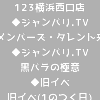
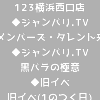
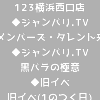
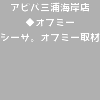
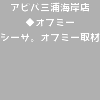
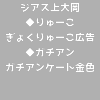
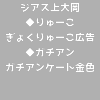
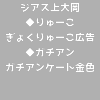
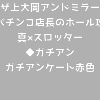
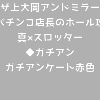
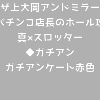
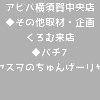
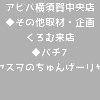
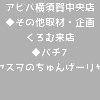
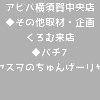
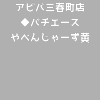
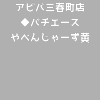
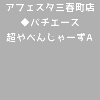
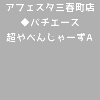
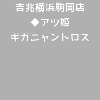
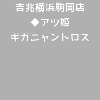
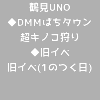
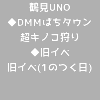
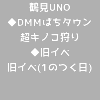
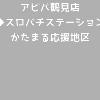
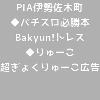
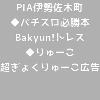
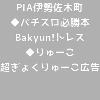
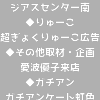
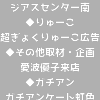
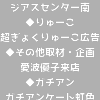
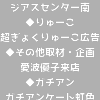
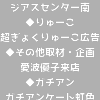
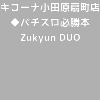
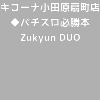
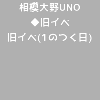
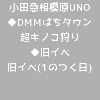
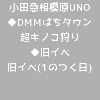
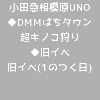
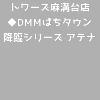
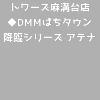
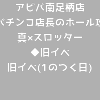
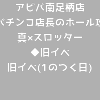
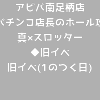
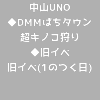
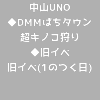
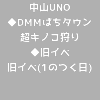
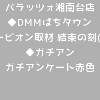
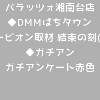
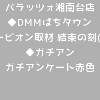
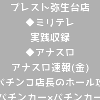
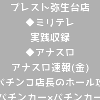
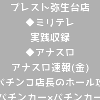

In [131]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import datetime
import time
import unicodedata
import string
import requests
from PIL import Image, ImageDraw, ImageFont
import folium
from folium.features import CustomIcon
# 地図生成
folium_map = folium.Map(location=[35.6894 ,139.6917], zoom_start=11)
# 地図表示
# マーカープロット（ポップアップ設定，色変更，アイコン変更）
for i, record in report_df.iterrows():
    #print(record['店舗名'])
    
    # グレースケールの画像データを作成
    img = Image.new("L", (100, 100),color=(55))
    im = img.copy()
    # 画像の表示
    im.putalpha(100)
    # 描画準備
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype('font\LightNovelPOPv2.otf',10)
    syuzai_name_text = ''
    extract_syuzai_df_1 = report_df[report_df['店舗名'] == record['店舗名']]
    extract_syuzai_df_2 = extract_syuzai_df_1.drop_duplicates(keep='first')
    for i,syuzai_record in extract_syuzai_df_2.iterrows():
        #print(record)
        syuzai_name_text += '◆' + syuzai_record['媒体名'] + '\n' + syuzai_record['取材名'] + '\n'
    #print(syuzai_name_text)
    draw.multiline_text(
        (50, 0),
        f'{record["店舗名"]}\n{syuzai_name_text}',
        font=font,
        fill='white',
        align='center',
        anchor='ma'
    )
    # 画像を表示
    im.save('syuzai_image.png', quality=95)
    img = 'syuzai_image.png'
    try:
        folium.Marker(location=[record['緯度'] ,record['経度']],
        popup=record['店舗名'],
        icon = CustomIcon(
                    icon_image = img,
                    icon_size = (70, 70),
                    icon_anchor = (0, 0),
                    #shadow_image = shadow_img, # 影効果（今回は使用せず コメントアウト
                    #shadow_size = (30, 30),
                    #shadow_anchor = (-4, -40),
                    popup_anchor = (3, 3))).add_to(folium_map)
    except:
        continue
        #break
folium_map.save(outfile="./test_map.html")
folium_map